# Avaliação 02 - Introdução ao Aprendizado de Máquina (ENGG67)

**Discentes:**

- **Gabriel Souza de Andrade**

- **Yago Cunha Martins Rodrigues**

### 2- Utilizando um banco de dados sugerido por você, aborde o problema de regressão utilizando o algoritmo k-NN. Implemente a regressão em Jupyter Notebook.

In [1]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 427.6 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 394.1 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 427.7 kB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 KB 313.6 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 370.3 kB/s eta 0:00:0000:0100:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 KB 324.7 kB/s eta 0:00:00a 0:00:01


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.feature_selection import f_classif


In [7]:
def plot_box(df):
    numerical_columns = list(df.select_dtypes('number').columns)
    for col in numerical_columns:
        plt.figure(figsize=(8,6))
        sns.boxplot(y=df[col])
        plt.show()

In [8]:
pd.set_option("display.max_columns", None)
sns.set_style('whitegrid')

    ID: Represents a unique identification of an entry
    Customer_ID: Represents a unique identification of a person
    Month: Represents the month of the year
    Name: Represents the name of a person
    Age: Represents the age of the person
    SSN: Represents the social security number of a person
    Occupation: Represents the occupation of the person
    Annual_Income: Represents the annual income of the person
    Monthly_Base_Salary: Represents the monthly base salary of a person
    Num_Bank_Accounts: Represents the number of bank accounts a person holds
    Num_Credit_Card: Represents the number of other credit cards held by a person
    Interest_Rate: Represents the interest rate on credit card
    Num_of_Loan: Represents the number of loans taken from the bank
    Type_of_Loan: Represents the types of loan taken by a person
    Delay_from_due_date: Represents the average number of days delayed from the payment date
    Num_of_delayed_Payment: Represents the average number of payments delayed by a person
    Changed_Credit_Limit: Represents the percentage change in credit card limit
    Num_Credit_Inquiries: Represents the number of credit card inquiries
    Credit_Mix: Represents the classification of the mix of credits
    Outstanding_Debt: Represents the remaining debt to be paid (in USD)
    Credit_Utilization_Ratio: Represents the utilization ratio of credit card
    Credit_History_Age: Represents the age of credit history of the person
    Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person
    Total_EMI_per_month: Represents the monthly EMI payments (in USD)
    Amount_invested_monthly: Represents the monthly amount invested by the customer (in USD)
    Payment_Behaviour: Represents the payment behavior of the customer (in USD)
    Monthly_Balance: Represents the monthly balance amount of the customer (in USD)
    Credit_Score: Represents the bracket of credit score (Poor, Standard, Good)

In [9]:
df_train = pd.read_csv('train.csv')

C:\Users\Yago\AppData\Local\Temp\ipykernel_3400\2832281975.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('train.csv')


## Eliminando colunas sem valores para a classificação

In [10]:
df_train = df_train.drop(['ID','Name','SSN','Month', 'Customer_ID'],axis=1)

## Existem duas variáveis que representam o salario, decidi utilizar a variavel de salario anual porque pode agregar bonificações que não se encontram no valor mensal

In [11]:
df_train = df_train.drop(['Monthly_Inhand_Salary'], axis = 1) 

## Verificar info das variáveis 

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  object 
 3   Num_Bank_Accounts         100000 non-null  int64  
 4   Num_Credit_Card           100000 non-null  int64  
 5   Interest_Rate             100000 non-null  int64  
 6   Num_of_Loan               100000 non-null  object 
 7   Type_of_Loan              88592 non-null   object 
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    92998 non-null   object 
 10  Changed_Credit_Limit      100000 non-null  object 
 11  Num_Credit_Inquiries      98035 non-null   float64
 12  Credit_Mix                100000 non-null  object 
 13  Outstanding_Debt          100000 non-null  ob

# tratemento para as variaveis que estão como object mas são float ou int :
- Age: int 
- Annual_Income: float
- Outstanding_Debt: float
- Num_of_Delayed_Payment:
- Monthly_Balance: float
- Num_of_Loan: int
- Changed_Credit_Limit: int
- Credit_History_Age data: float que representa anos
- Amount_invested_monthly: float
### tratamento das strings, que contem valores invalidos como simbolos:

- Payment_Behaviour: removendo "!@9#%8"
- Payment_of_Min_Amount: removendo "NM"
- Credit_Mix: removendo "_"
- Occupation: removendo "_______"

In [25]:
# df_train['Age'] = df_train['Age'].str.replace(r'\D+', '').astype(int) 

# df_train['Annual_Income'] = df_train['Annual_Income'].str.replace('_', '').astype(float)
# df_train['Outstanding_Debt'] = df_train['Outstanding_Debt'].str.replace('_', '').astype(float)

df_train['Age'] = df_train['Age'].astype(str).str.replace(r'\D', '', regex=True).astype(int)
df_train['Annual_Income'] = df_train['Annual_Income'].str.replace('_', '').astype(float)
df_train['Outstanding_Debt'] = df_train['Outstanding_Debt'].str.replace('_', '').astype(float)


df_train['Num_of_Delayed_Payment'] = df_train['Num_of_Delayed_Payment'].str.replace('_', '').astype(float)
df_train['Monthly_Balance']=df_train['Monthly_Balance'].replace('__-333333333333333333333333333__',np.nan).astype(float)
df_train['Num_of_Loan'] = df_train['Num_of_Loan'].apply(lambda x: str(x).replace("_"," "))
df_train['Num_of_Loan'] = pd.to_numeric(df_train['Num_of_Loan'])
df_train['Changed_Credit_Limit'] = df_train['Changed_Credit_Limit'].apply(lambda x: str(x).replace("_", ""))
df_train['Changed_Credit_Limit'] = pd.to_numeric(df_train['Changed_Credit_Limit'])
df_train['Credit_History_Age'] = df_train['Credit_History_Age'].replace('nan', np.nan) 
df_train.drop(df_train[df_train['Credit_History_Age'].isnull()].index,axis=0,inplace=True)
df_train['Credit_History_Age'] = df_train['Credit_History_Age'].astype(str)                        
df_train['History_Year'] = df_train['Credit_History_Age'].str[ :2]                                 
df_train['History_Month'] = df_train['Credit_History_Age'].str[ -9:-7]           
df_train['History_Year'] = pd.to_numeric(df_train['History_Year'])    
df_train['History_Month'] = pd.to_numeric(df_train['History_Month']) 
df_train['Credit_History_Age'] = df_train['History_Year']  + df_train['History_Month']/12
df_train = df_train.drop(['History_Year','History_Month'], axis = 1)     
df_train['Amount_invested_monthly'] = df_train['Amount_invested_monthly'].str.replace('_', '').astype(float)

In [26]:
df_train.Payment_Behaviour = df_train.Payment_Behaviour.replace("!@9#%8",np.nan)
df_train.Payment_of_Min_Amount = df_train.Payment_of_Min_Amount.replace("NM",np.nan)
df_train.Credit_Mix = df_train.Credit_Mix.replace("_",np.nan)
df_train.Occupation = df_train.Occupation.replace("_______",np.nan)

## Verificando q quantidade de registros com alguma variável nula para remover


In [27]:
df_train.isnull().sum()

Age                             0
Occupation                   4869
Annual_Income                   0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit         1446
Num_Credit_Inquiries            0
Credit_Mix                  13960
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount        8337
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour            5170
Monthly_Balance                 7
Credit_Score                    0
dtype: int64

In [28]:
df_train = df_train.dropna()

## Verificando o Df após

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40975 entries, 3 to 99997
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       40975 non-null  int32  
 1   Occupation                40975 non-null  object 
 2   Annual_Income             40975 non-null  float64
 3   Num_Bank_Accounts         40975 non-null  int64  
 4   Num_Credit_Card           40975 non-null  int64  
 5   Interest_Rate             40975 non-null  int64  
 6   Num_of_Loan               40975 non-null  int64  
 7   Type_of_Loan              40975 non-null  object 
 8   Delay_from_due_date       40975 non-null  int64  
 9   Num_of_Delayed_Payment    40975 non-null  float64
 10  Changed_Credit_Limit      40975 non-null  float64
 11  Num_Credit_Inquiries      40975 non-null  float64
 12  Credit_Mix                40975 non-null  object 
 13  Outstanding_Debt          40975 non-null  float64
 14  Credit_Util

### Boxplot após drop null

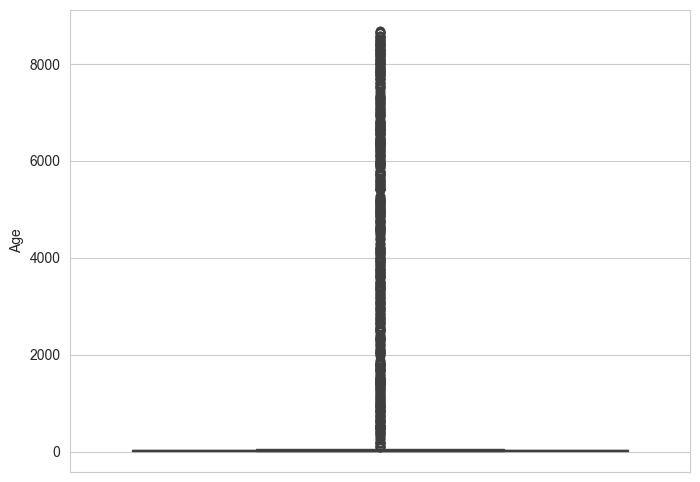

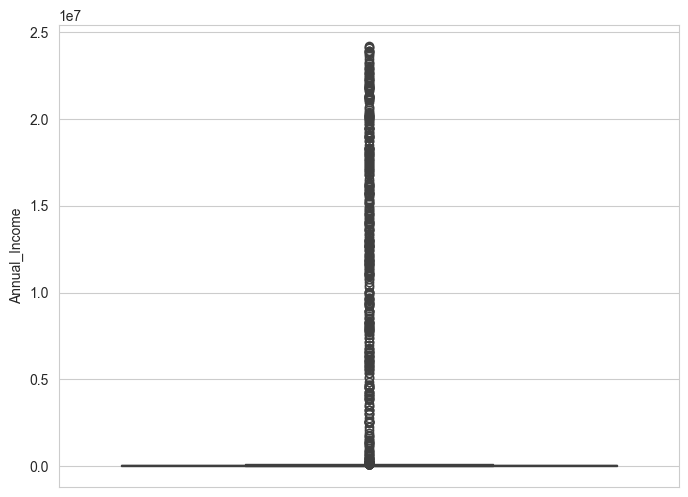

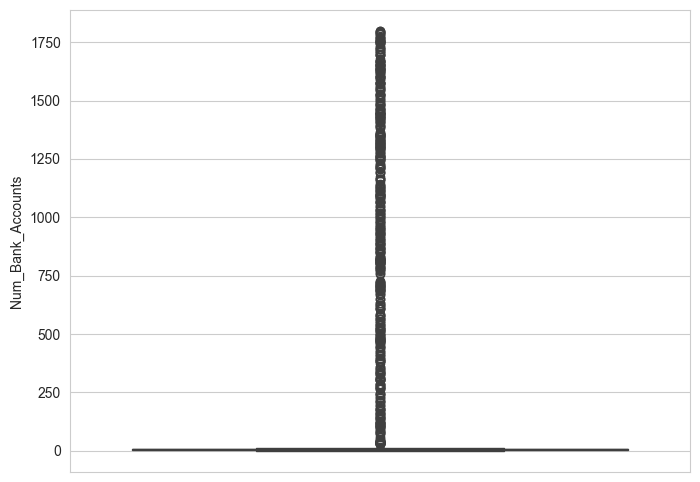

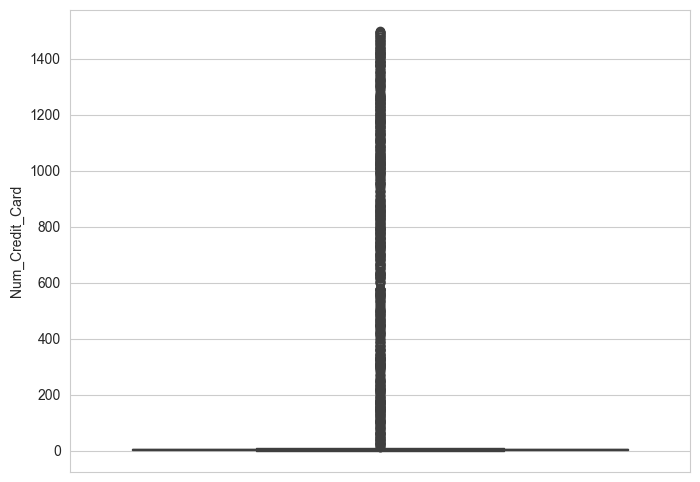

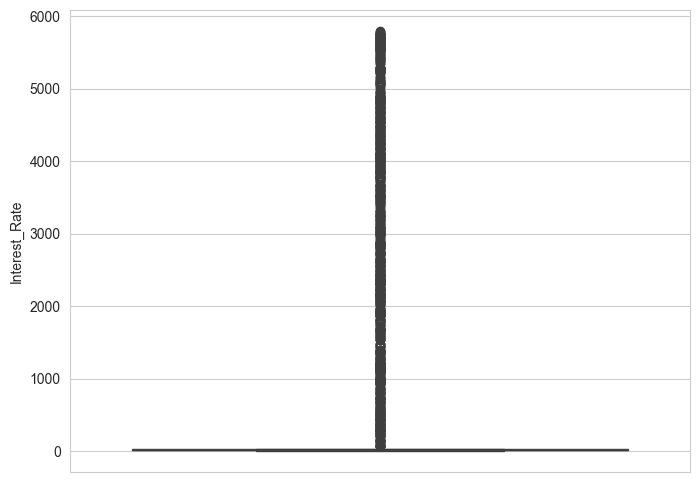

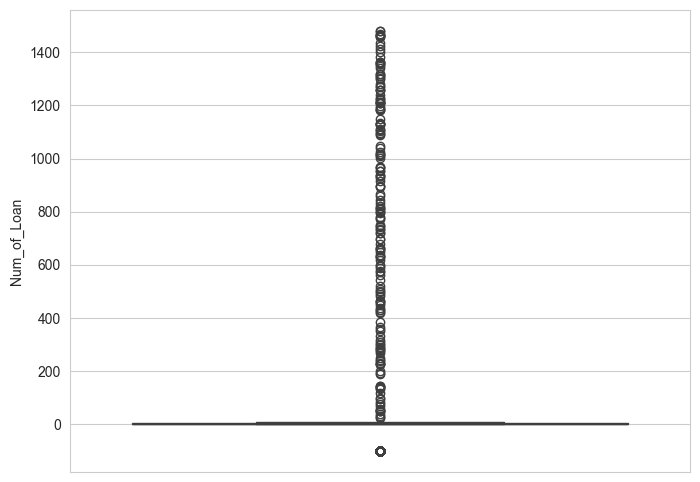

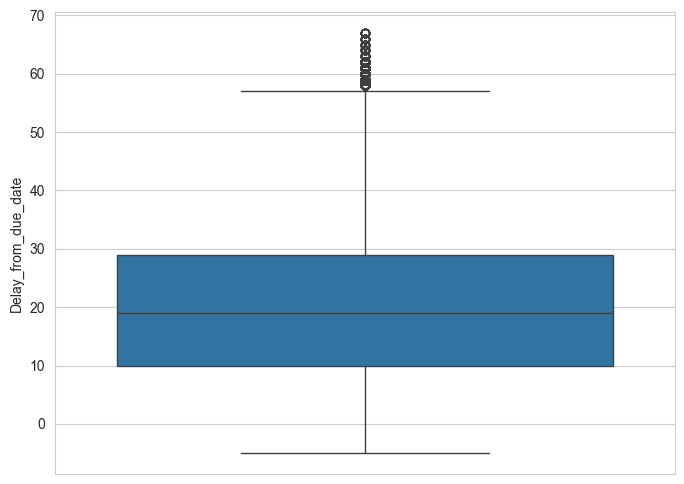

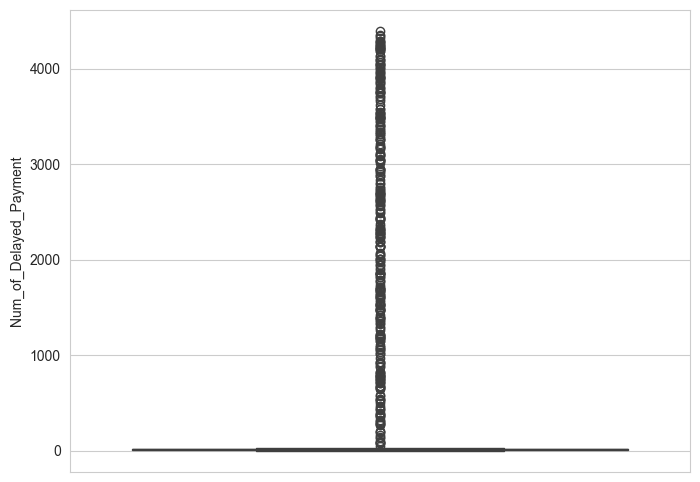

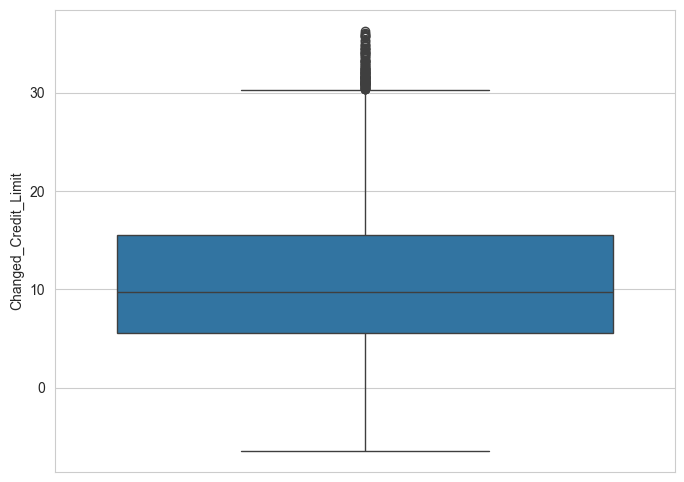

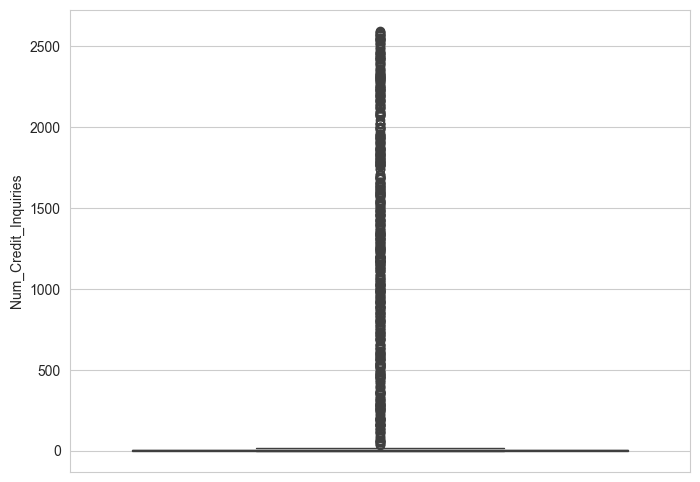

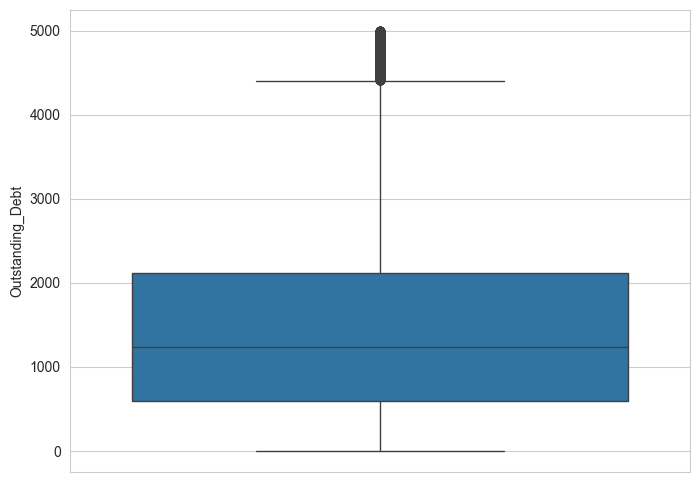

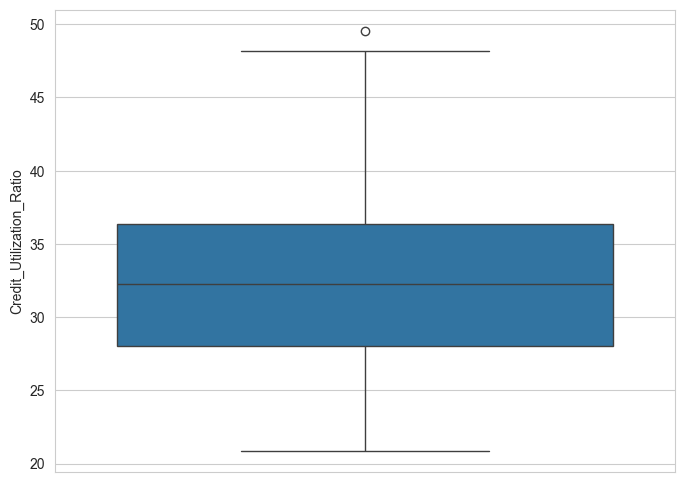

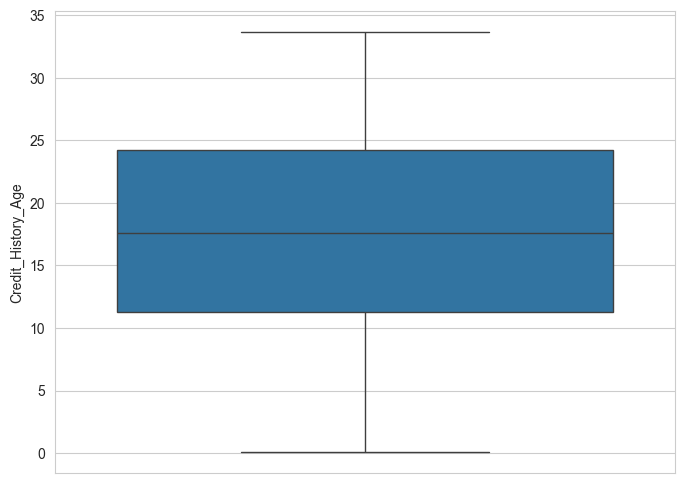

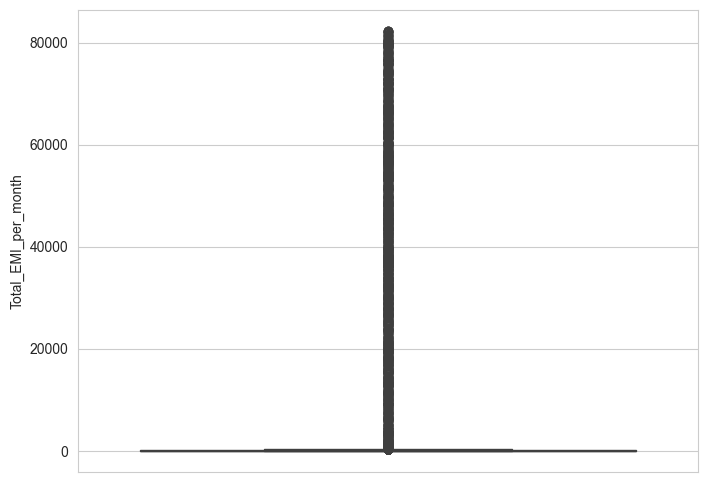

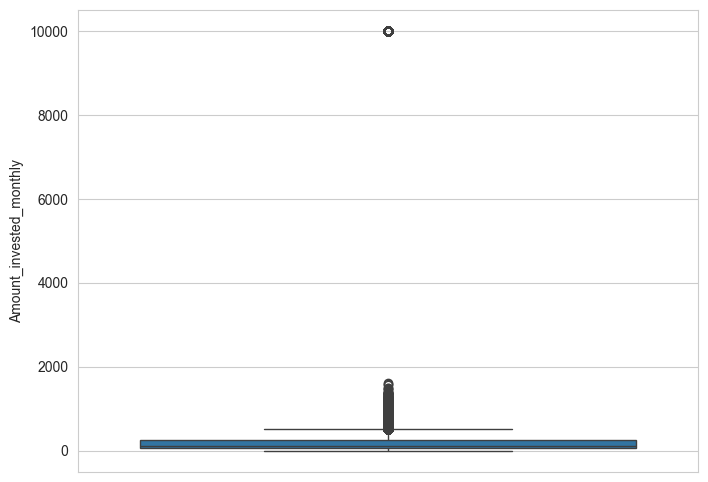

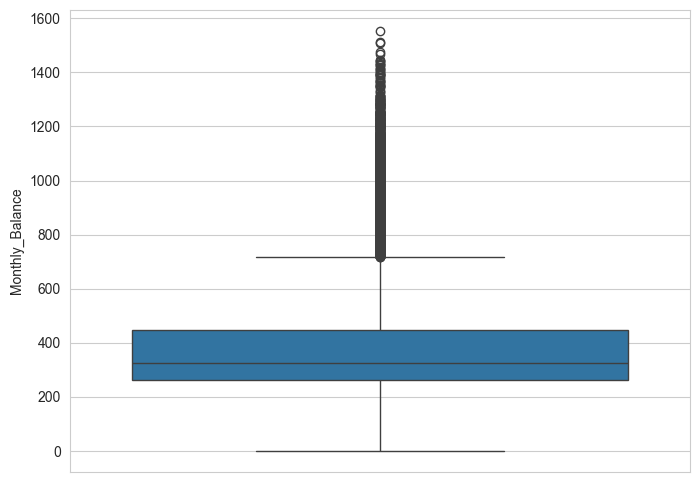

In [30]:
plot_box(df_train)

## Describe do df

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40975 entries, 3 to 99997
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       40975 non-null  int32  
 1   Occupation                40975 non-null  object 
 2   Annual_Income             40975 non-null  float64
 3   Num_Bank_Accounts         40975 non-null  int64  
 4   Num_Credit_Card           40975 non-null  int64  
 5   Interest_Rate             40975 non-null  int64  
 6   Num_of_Loan               40975 non-null  int64  
 7   Type_of_Loan              40975 non-null  object 
 8   Delay_from_due_date       40975 non-null  int64  
 9   Num_of_Delayed_Payment    40975 non-null  float64
 10  Changed_Credit_Limit      40975 non-null  float64
 11  Num_Credit_Inquiries      40975 non-null  float64
 12  Credit_Mix                40975 non-null  object 
 13  Outstanding_Debt          40975 non-null  float64
 14  Credit_Util

## Limpando outliers

In [32]:
df_train.drop(df_train[(df_train['Amount_invested_monthly']<0) | (df_train['Amount_invested_monthly']>2042)].index,axis=0,inplace=True)
df_train.drop(df_train[(df_train['Num_of_Loan']<0) | (df_train['Num_of_Loan']>12)].index,axis=0,inplace=True)
df_train.drop(df_train[(df_train['Num_of_Delayed_Payment']<0) | (df_train['Num_of_Delayed_Payment']>40)].index,axis=0,inplace=True)
df_train.drop(df_train[df_train['Interest_Rate']>50].index,axis=0,inplace=True)
df_train.drop(df_train[(df_train['Num_Bank_Accounts']<0) | (df_train['Num_Bank_Accounts']>12)].index,axis=0,inplace=True)
df_train.drop(df_train[(df_train['Num_Credit_Card']<0) | (df_train['Num_Credit_Card']>12)].index,axis=0,inplace=True)
df_train.drop(df_train[(df_train['Age']<0) | (df_train['Age']>80)].index,axis=0, inplace=True)
df_train.drop(df_train[(df_train['Credit_History_Age']<0) | (df_train['Credit_History_Age']>40)].index,axis=0, inplace=True)

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33887 entries, 3 to 99991
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       33887 non-null  int32  
 1   Occupation                33887 non-null  object 
 2   Annual_Income             33887 non-null  float64
 3   Num_Bank_Accounts         33887 non-null  int64  
 4   Num_Credit_Card           33887 non-null  int64  
 5   Interest_Rate             33887 non-null  int64  
 6   Num_of_Loan               33887 non-null  int64  
 7   Type_of_Loan              33887 non-null  object 
 8   Delay_from_due_date       33887 non-null  int64  
 9   Num_of_Delayed_Payment    33887 non-null  float64
 10  Changed_Credit_Limit      33887 non-null  float64
 11  Num_Credit_Inquiries      33887 non-null  float64
 12  Credit_Mix                33887 non-null  object 
 13  Outstanding_Debt          33887 non-null  float64
 14  Credit_Util

## Plot variáveis categoricas após as limpezas

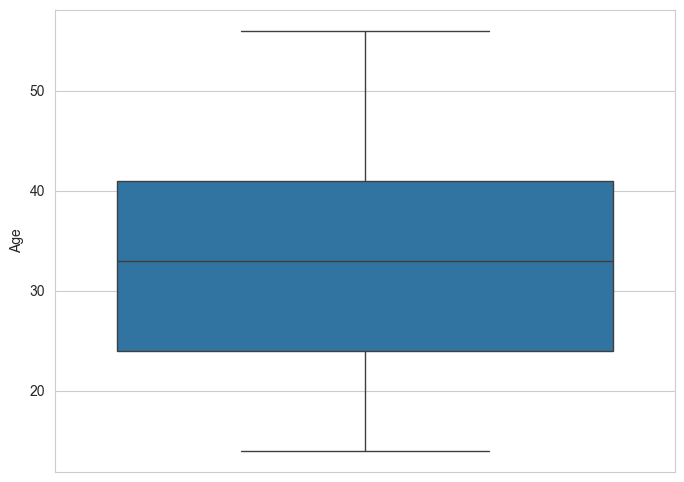

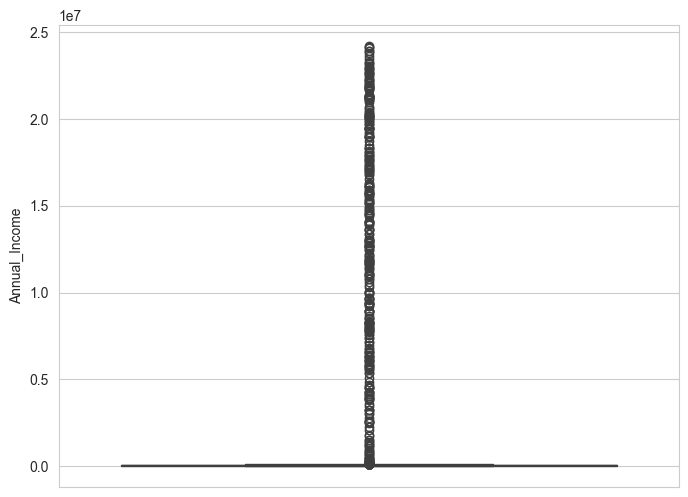

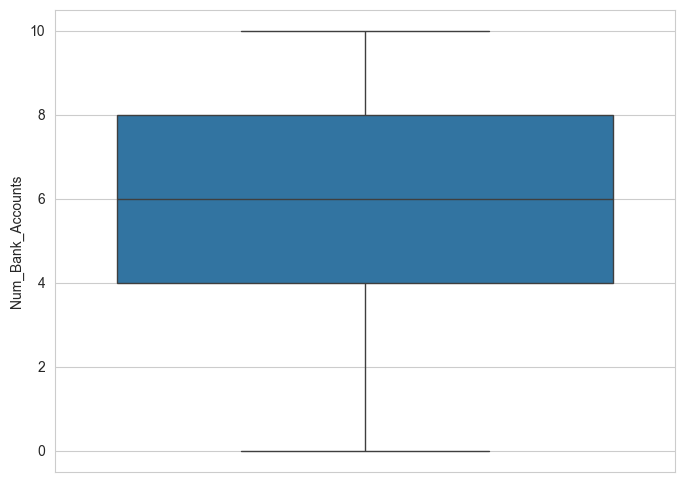

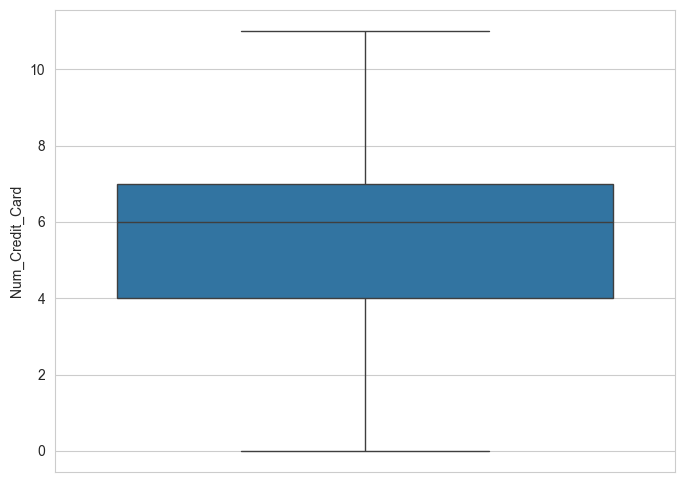

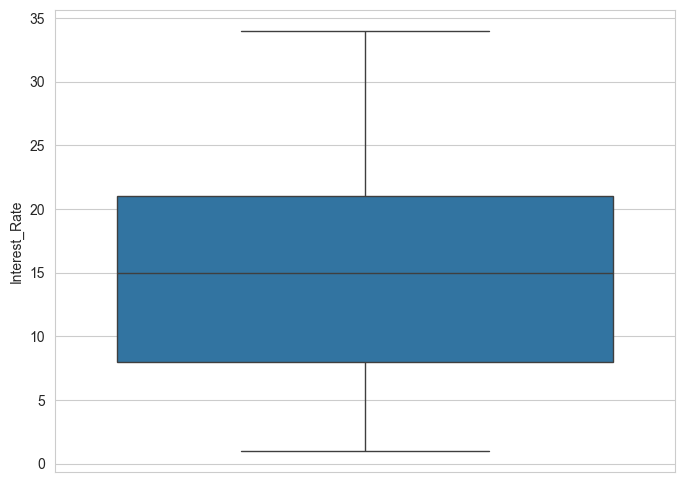

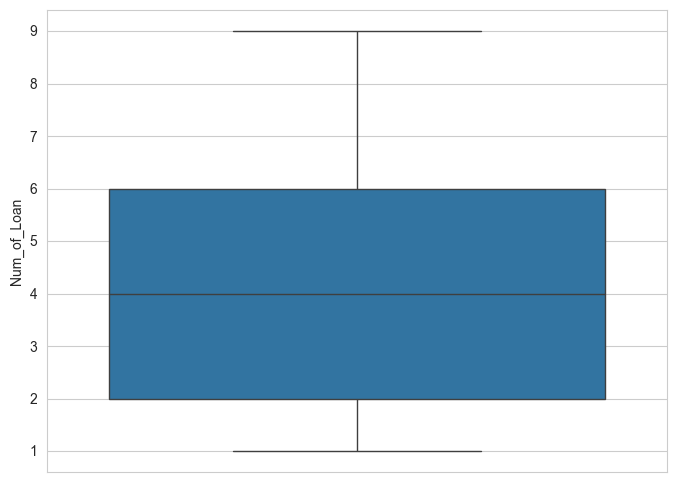

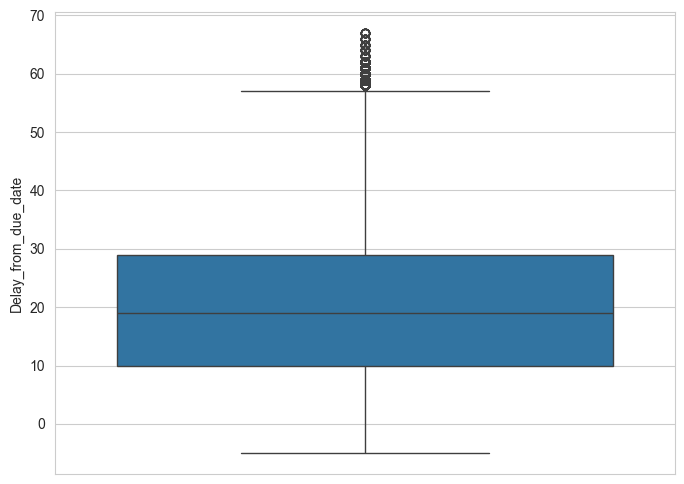

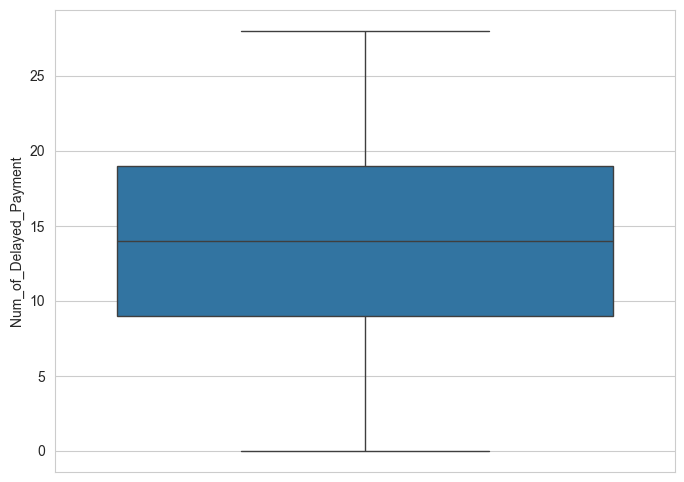

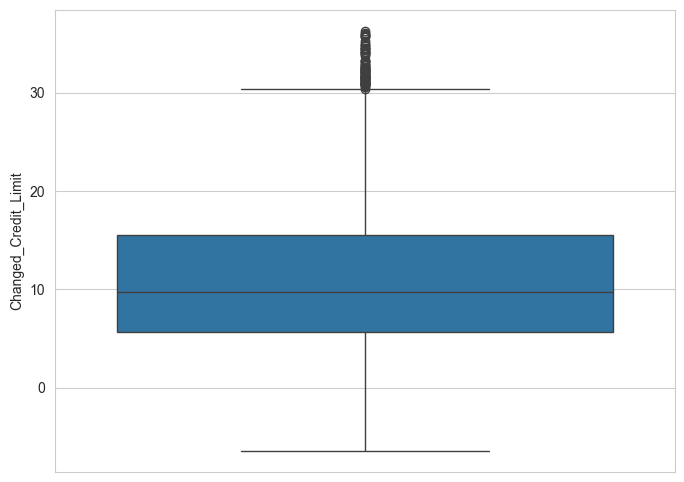

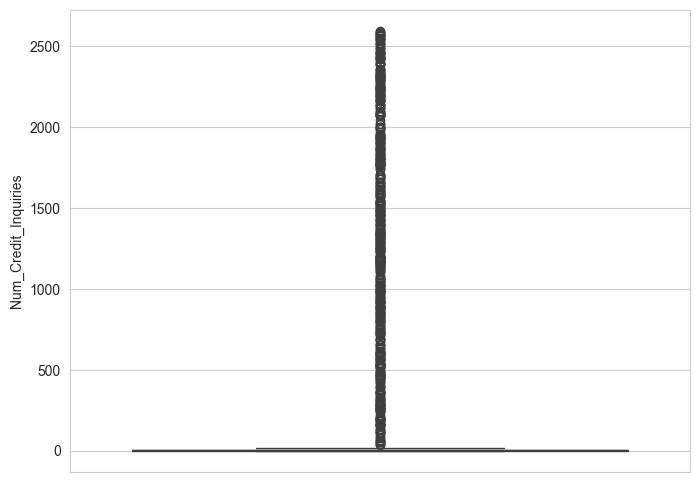

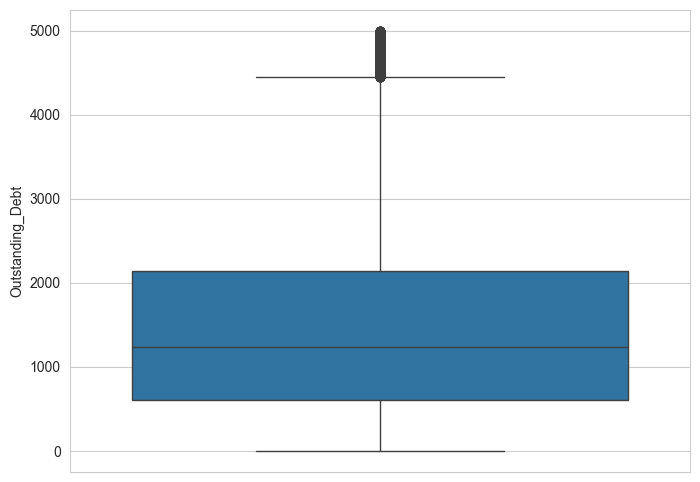

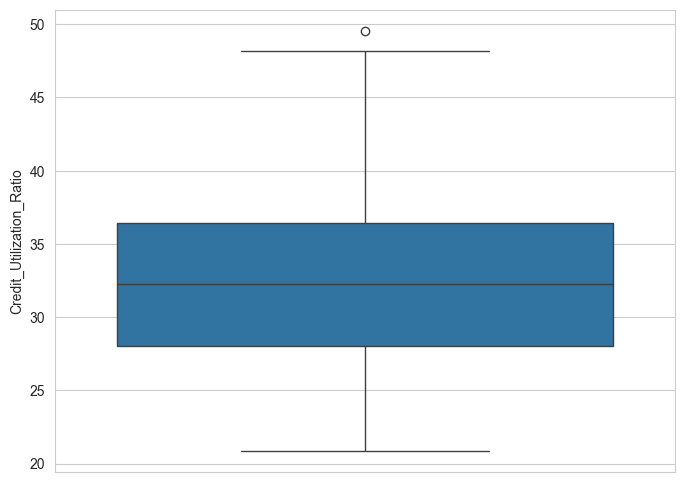

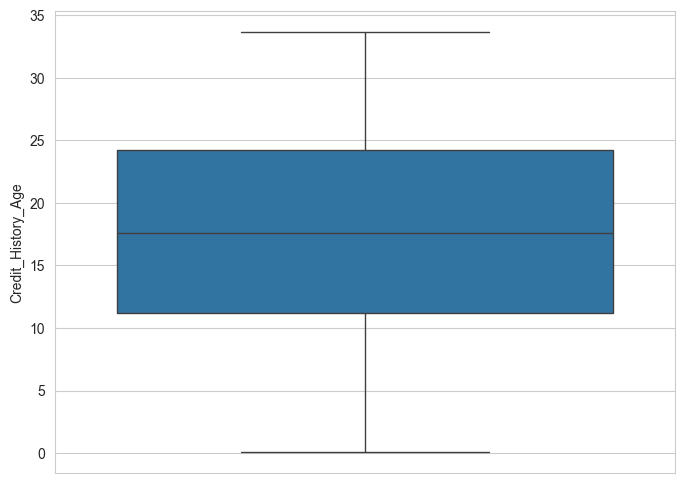

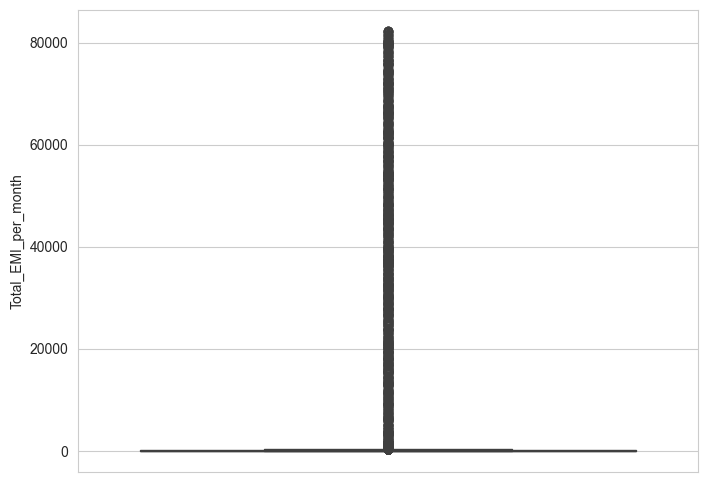

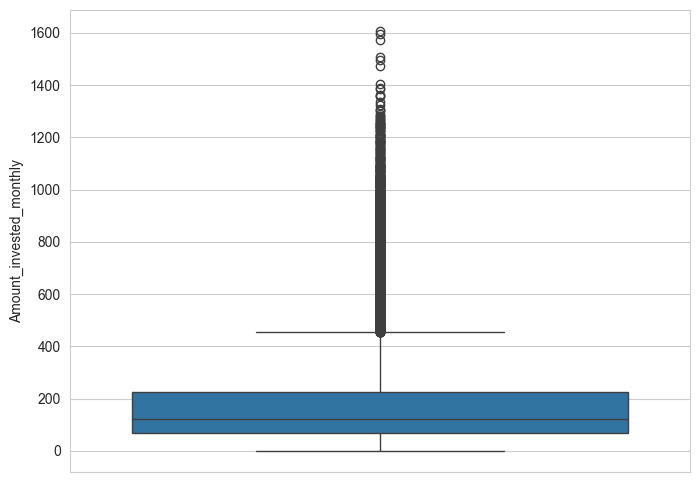

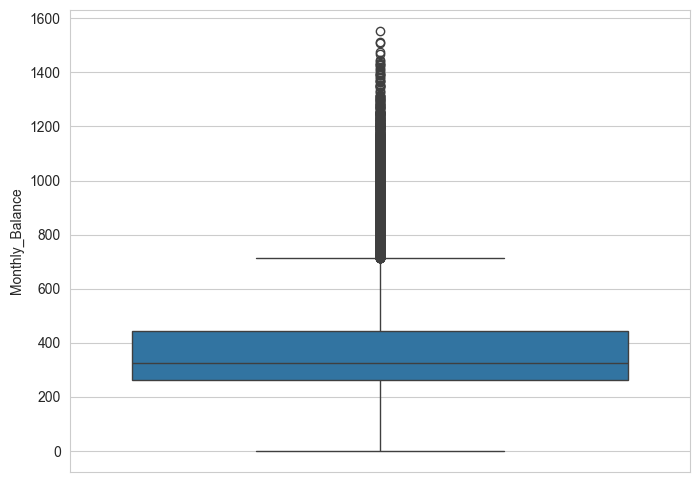

In [34]:
plot_box(df_train)

#### occupation

C:\Users\Yago\AppData\Local\Temp\ipykernel_3400\2763951532.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize = 16)


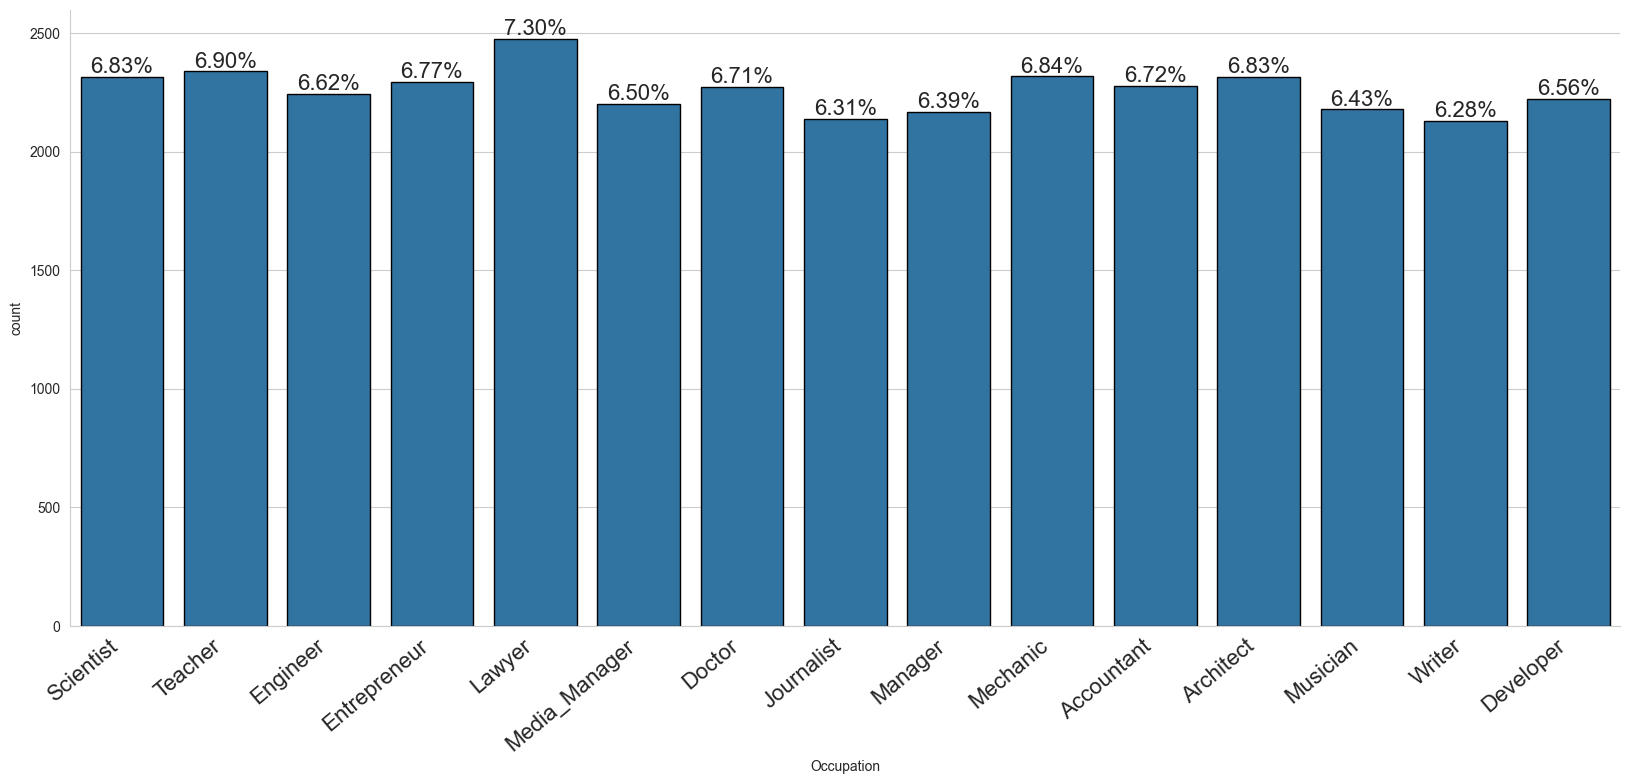

In [35]:

plt.figure(figsize=(20,8))

ax = sns.countplot(x='Occupation', data=df_train, edgecolor='black')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+.4, height, '{:.2%}'.format(height/len(df_train)), ha='center', va='bottom', fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize = 16)

sns.despine()

#### Payment_Behaviour

C:\Users\Yago\AppData\Local\Temp\ipykernel_3400\3336179749.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize = 16)


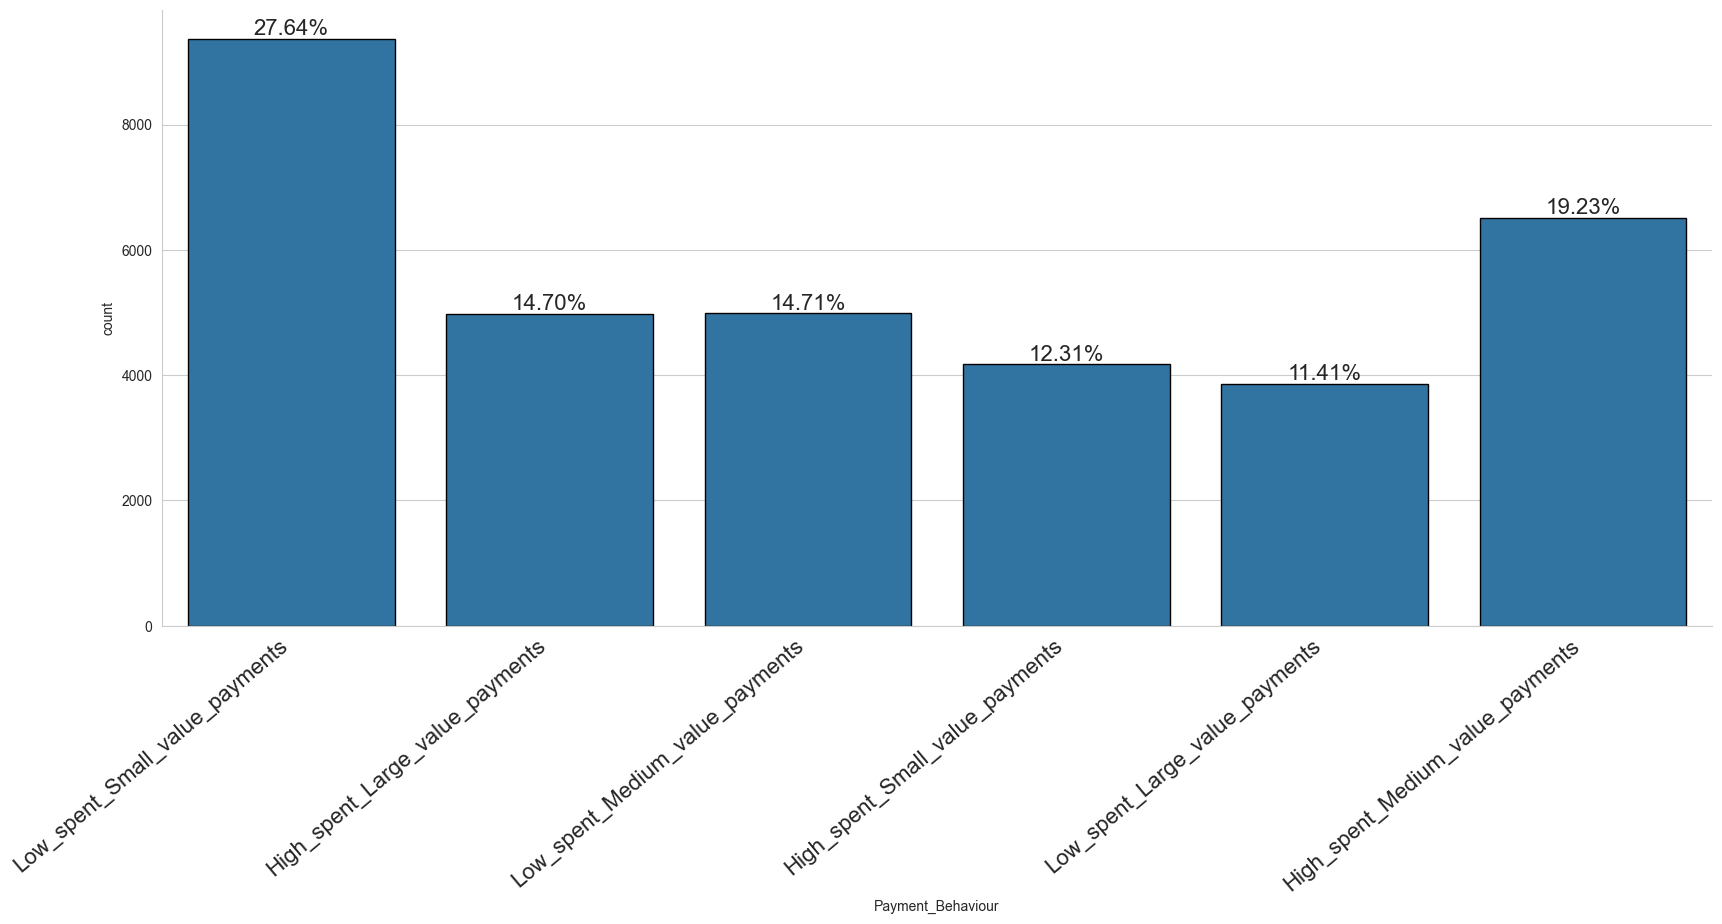

In [36]:
plt.figure(figsize=(20,8))

ax = sns.countplot(x='Payment_Behaviour', data=df_train, edgecolor='black')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+.4, height, '{:.2%}'.format(height/len(df_train)), ha='center', va='bottom', fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize = 16)

sns.despine()

#### Payment_of_Min_Amount

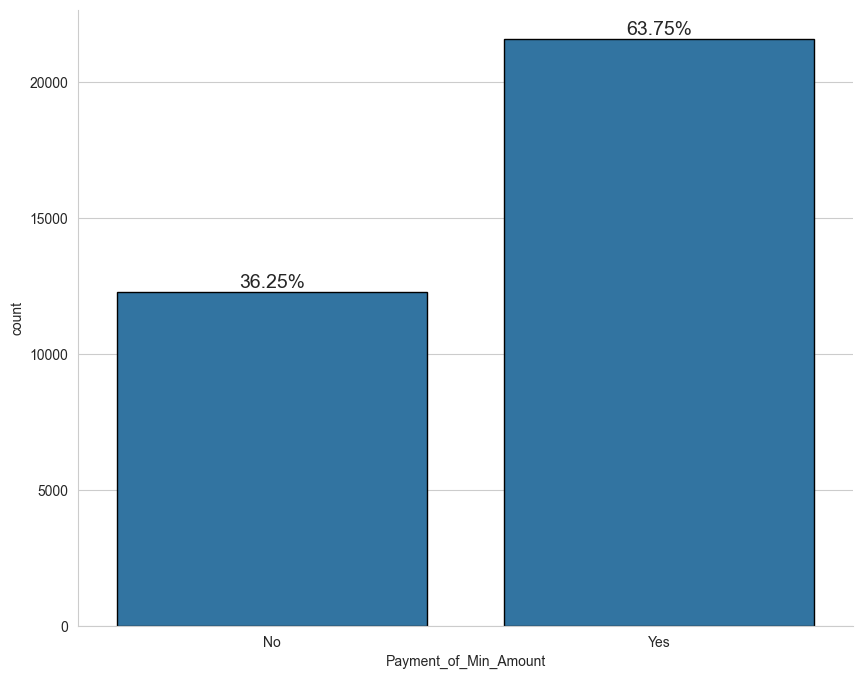

In [37]:
plt.figure(figsize=(10,8))

ax = sns.countplot(x='Payment_of_Min_Amount', data=df_train, edgecolor='black')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+.4, height, '{:.2%}'.format(height/len(df_train)), ha='center', va='bottom', fontsize=14)

sns.despine()

#### Credit_Mix

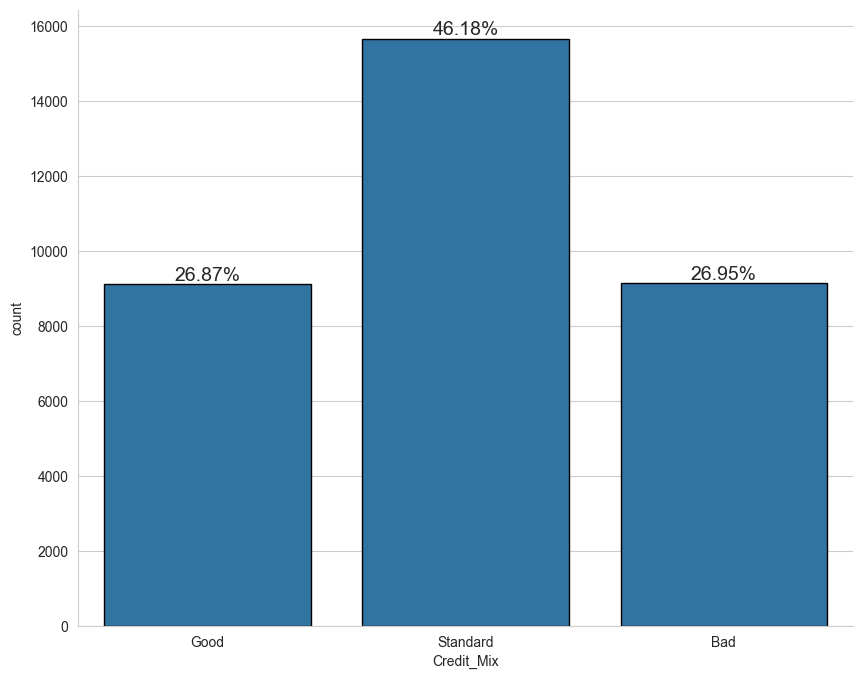

In [38]:
plt.figure(figsize=(10,8))

ax = sns.countplot(x='Credit_Mix', data=df_train, edgecolor='black')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+.4, height, '{:.2%}'.format(height/len(df_train)), ha='center', va='bottom', fontsize=14)

sns.despine()

#### Credit_Score(variavel de preditora)

## Alterando o nome da variável 

In [39]:
df_train.loc[df_train["Credit_Score"].isin(['Good']), 'Credit_Score_category'] = 'Risco Baixo '
df_train.loc[df_train["Credit_Score"].isin(['Standard']), 'Credit_Score_category'] = 'Risco Médio'
df_train.loc[df_train["Credit_Score"].isin(['Poor']), 'Credit_Score_category'] = 'Risco Alto'

df_train["Credit_Score"] = df_train["Credit_Score_category"]
df_train = df_train.drop(["Credit_Score_category"], axis =1)

C:\Users\Yago\AppData\Local\Temp\ipykernel_3400\1473636783.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Risco Baixo ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_train.loc[df_train["Credit_Score"].isin(['Good']), 'Credit_Score_category'] = 'Risco Baixo '


C:\Users\Yago\AppData\Local\Temp\ipykernel_3400\2101010759.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize = 14)


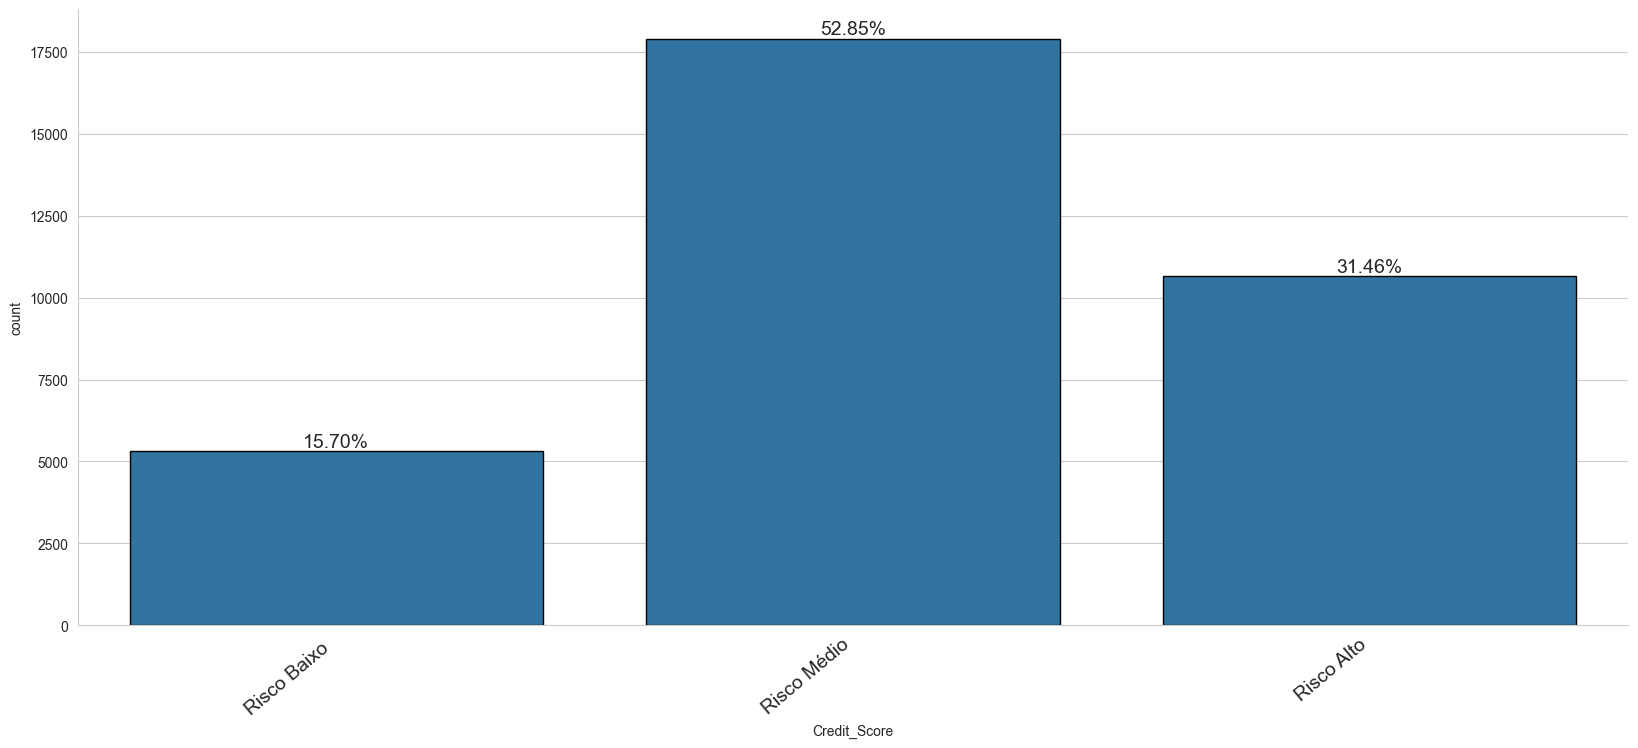

In [40]:
plt.figure(figsize=(20,8))

ax = sns.countplot(x='Credit_Score', data=df_train, edgecolor='black')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+.4, height, '{:.2%}'.format(height/len(df_train)), ha='center', va='bottom', fontsize=14)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize = 14)

sns.despine()

### Correlação com todas as variáveis

In [41]:
df = df_train.select_dtypes(exclude=['object'])

<Axes: >

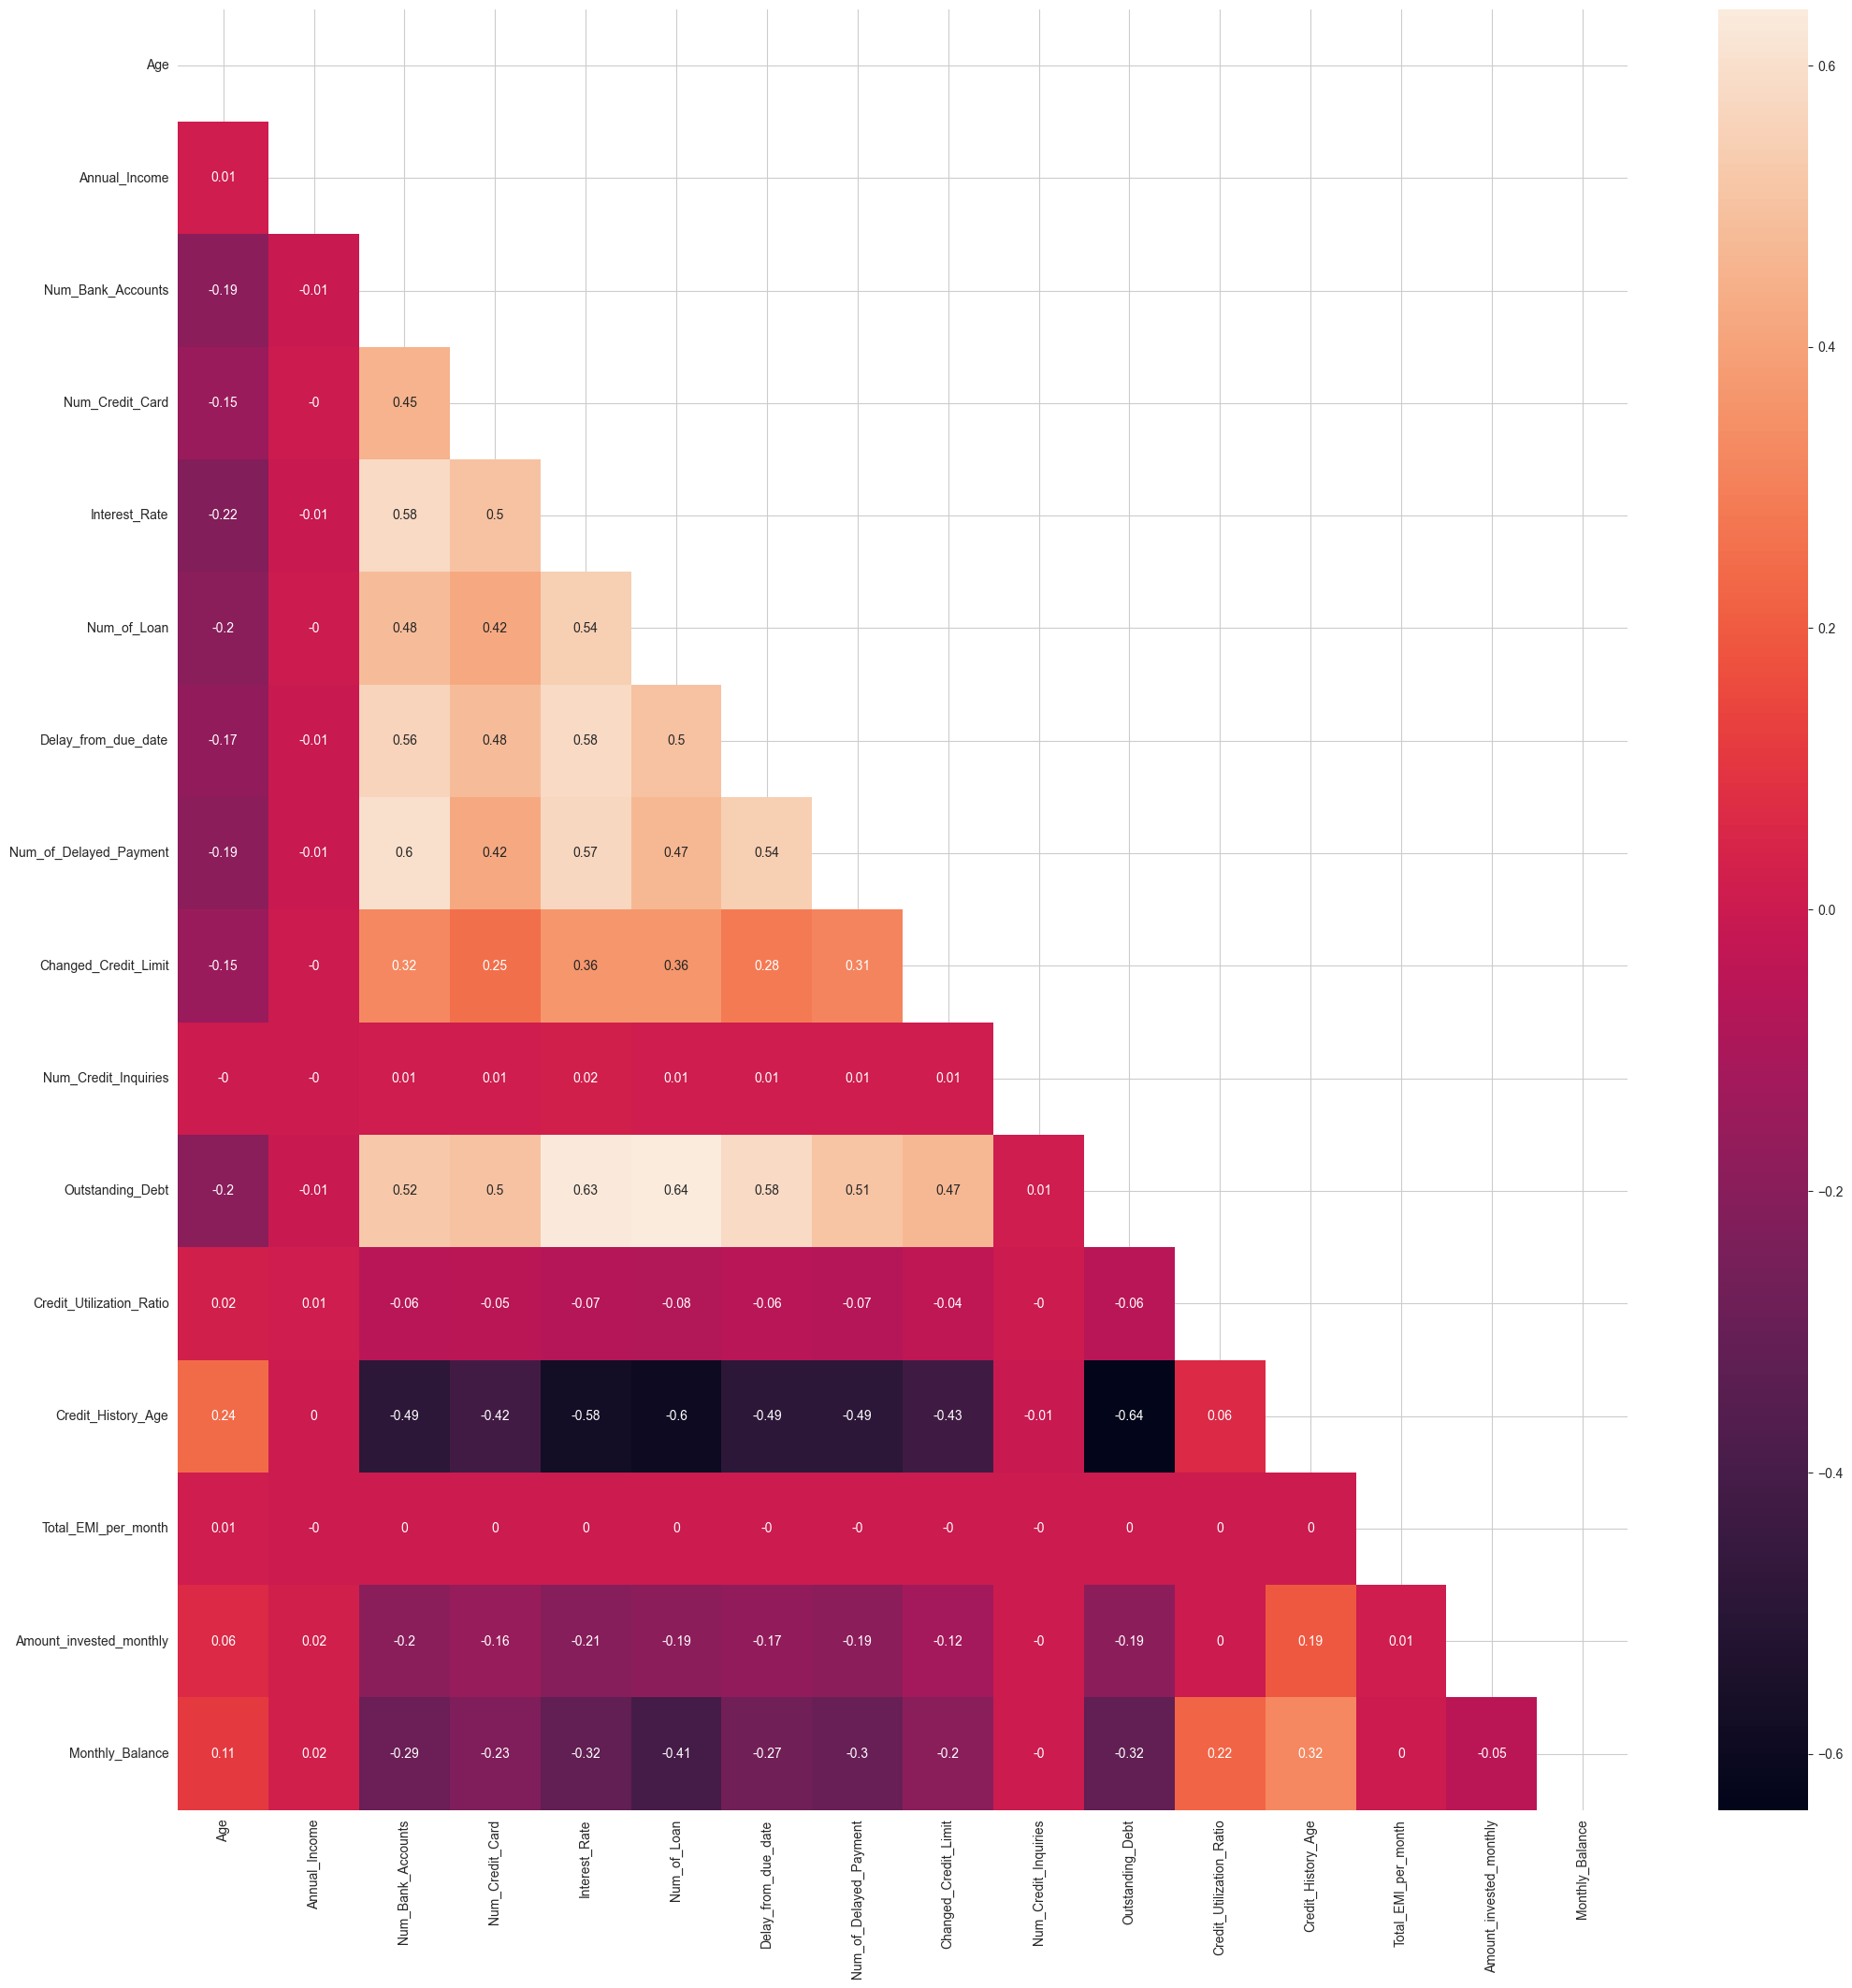

In [42]:
# checking correlations
corr = df.corr().round(2)

plt.figure(figsize=(25,25))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, mask=mask, cbar=True)

# Modelo 2 sem algumas variáveis

In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33887 entries, 3 to 99991
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       33887 non-null  int32  
 1   Occupation                33887 non-null  object 
 2   Annual_Income             33887 non-null  float64
 3   Num_Bank_Accounts         33887 non-null  int64  
 4   Num_Credit_Card           33887 non-null  int64  
 5   Interest_Rate             33887 non-null  int64  
 6   Num_of_Loan               33887 non-null  int64  
 7   Type_of_Loan              33887 non-null  object 
 8   Delay_from_due_date       33887 non-null  int64  
 9   Num_of_Delayed_Payment    33887 non-null  float64
 10  Changed_Credit_Limit      33887 non-null  float64
 11  Num_Credit_Inquiries      33887 non-null  float64
 12  Credit_Mix                33887 non-null  object 
 13  Outstanding_Debt          33887 non-null  float64
 14  Credit_Util

### Correlação

In [44]:
var_remove =['Num_Credit_Card', 'Num_Credit_Inquiries',  'Total_EMI_per_month','Credit_Utilization_Ratio', 'Occupation','Payment_Behaviour', 'Type_of_Loan']

In [45]:
df_model2 = df_train.drop(var_remove, axis = 1)

In [46]:
# checking correlations
corr = df_model2.corr().round(2)

plt.figure(figsize=(25,25))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, mask=mask, cbar=True)

ValueError: could not convert string to float: 'Good'

### Dummy 

In [47]:
df_model2 = pd.get_dummies(df_model2, columns=['Payment_of_Min_Amount','Credit_Mix'])

In [48]:
df_model2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33887 entries, 3 to 99991
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        33887 non-null  int32  
 1   Annual_Income              33887 non-null  float64
 2   Num_Bank_Accounts          33887 non-null  int64  
 3   Interest_Rate              33887 non-null  int64  
 4   Num_of_Loan                33887 non-null  int64  
 5   Delay_from_due_date        33887 non-null  int64  
 6   Num_of_Delayed_Payment     33887 non-null  float64
 7   Changed_Credit_Limit       33887 non-null  float64
 8   Outstanding_Debt           33887 non-null  float64
 9   Credit_History_Age         33887 non-null  float64
 10  Amount_invested_monthly    33887 non-null  float64
 11  Monthly_Balance            33887 non-null  float64
 12  Credit_Score               33887 non-null  object 
 13  Payment_of_Min_Amount_No   33887 non-null  bool   


### Normalizando

In [49]:
# df_model2.loc[df_model2["Credit_Score"].isin(['Good','Standard']), 'Credit_Score_category'] = 'Baixo-Médio-Risco'
# df_model2.loc[df_model2["Credit_Score"].isin(['Poor']), 'Credit_Score_category'] = 'Alto-Risco'

In [50]:
# df_model2.loc[df_model2["Credit_Score"].isin(['Good']), 'Credit_Score_category'] = 'Baixo Risco'
# df_model2.loc[df_model2["Credit_Score"].isin(['Standard']), 'Credit_Score_category'] = 'Médio Risco'
# df_model2.loc[df_model2["Credit_Score"].isin(['Poor']), 'Credit_Score_category'] = 'Alto Risco'

In [51]:
sc = StandardScaler() 
X, y = df_model2.drop(["Credit_Score"], axis=1), df_model2["Credit_Score"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3 , random_state=0, stratify =y)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
f_score, f_p_value = f_classif(X,y)
print('F - score score   ', f_score)
print('F - score p-value ', f_p_value)


F - score score    [4.26765774e+02 5.40195499e-01 3.23246366e+03 5.39215849e+03
 2.15551168e+03 3.80783063e+03 3.03722771e+03 8.22770797e+02
 2.94892225e+03 3.06050652e+03 4.52618377e+02 6.77968559e+02
 5.12388769e+03 5.12388769e+03 3.15104020e+03 7.25192355e+03
 2.62504927e+03]
F - score p-value  [8.99226763e-184 5.82639354e-001 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 1.02386293e-194 1.99832972e-289
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000]


### Knn

In [53]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [54]:

preditos_treino = knn.predict(X_train)
preditos_teste = knn.predict(X_test)

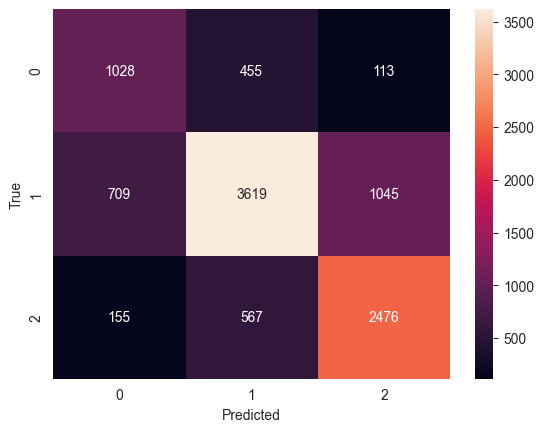

In [55]:
#confusion matrix k=4
cf_matrix = confusion_matrix(y_test, preditos_teste, labels = ['Risco Baixo ','Risco Médio', 'Risco Alto'])
sns.heatmap(cf_matrix, annot=True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [57]:
acc_teste = accuracy_score(preditos_teste, y_test)

print('A Acurácia de TESTE foi:  {:.2f}%'.format(100*acc_teste))

A Acurácia de TESTE foi:  70.06%


In [58]:
 
target_names = ['Risco Baixo ','Risco Médio', 'Risco Alto']
print(classification_report(y_test, preditos_teste, target_names=target_names))

              precision    recall  f1-score   support

Risco Baixo        0.68      0.77      0.72      3198
 Risco Médio       0.54      0.64      0.59      1596
  Risco Alto       0.78      0.67      0.72      5373

    accuracy                           0.70     10167
   macro avg       0.67      0.70      0.68     10167
weighted avg       0.71      0.70      0.70     10167



### Encontrar melhor valor para Knn

In [59]:
# Encontrando o melhor valor de K através de Validação Cruzada K-FOLD Leave-One-Out

 
kf = KFold(n_splits = 10, shuffle = True)
valores = np.arange(1, 100)
parametros = {'n_neighbors': valores}

clf1 = GridSearchCV(KNeighborsClassifier(), param_grid = parametros, cv = kf, scoring = 'accuracy')
clf1.fit(X_train, y_train)
clf1.best_params_
# # {'n_neighbors': 4}
 

{'n_neighbors': 8}

### Knn

In [61]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [62]:

preditos_treino = knn.predict(X_train)
preditos_teste = knn.predict(X_test)

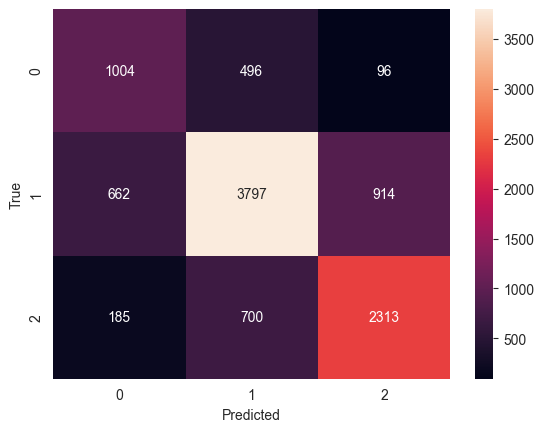

In [63]:
#confusion matrix k=4
cf_matrix = confusion_matrix(y_test, preditos_teste, labels = ['Risco Baixo ','Risco Médio', 'Risco Alto'])
sns.heatmap(cf_matrix, annot=True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [64]:
acc_teste = accuracy_score(preditos_teste, y_test)

print('A Acurácia de TESTE foi:  {:.2f}%'.format(100*acc_teste))

A Acurácia de TESTE foi:  69.97%


In [65]:
 
target_names = ['Risco Baixo ','Risco Médio', 'Risco Alto']
print(classification_report(y_test, preditos_teste, target_names=target_names))

              precision    recall  f1-score   support

Risco Baixo        0.70      0.72      0.71      3198
 Risco Médio       0.54      0.63      0.58      1596
  Risco Alto       0.76      0.71      0.73      5373

    accuracy                           0.70     10167
   macro avg       0.67      0.69      0.67     10167
weighted avg       0.71      0.70      0.70     10167

